# Data : Review PeduliLindungi Januari 2022 (Google Play)

First of all, we need to load our data.

---

I didn't use score 3 in this case because it contains ambiguity, some of the positive reviews came with a score of 3, and some of the negative reviews came with a score of 3 too. So, to avoid bias I decided to not use score 3 in this analysis.

In [ ]:
import pandas as pd

df_review = pd.read_csv("pedulilindungi-januari-2022-no-score-3.csv")

In [ ]:
df_review.tail()

,userName,score,at,content
25610,Dafa official,5,1/1/2022 0:07,Apk ini sangat bagus untuk bisa masuk mall tem...
25611,Haikal Nur Muhammad,5,1/1/2022 0:04,"Plis nerf paquito, gila jir sakit bgt damage nya"
25612,Vino Fino,1,1/1/2022 0:04,Kok sudah saya dowlowd apk nya tp kok gk bisa ...
25613,Bayu Sugianto,5,1/1/2022 0:02,Manntappp
25614,Maryadi Mazkid,1,1/1/2022 0:00,Lwmot klo mendung. Kijor


Count the value of each "score".

In [ ]:
df_review["score"].value_counts()

5    17530
1     4704
4     2368
2     1013
Name: score, dtype: int64

# Data Labeling

Positive labels are given to reviews with a score of 4 and 5, while negative labels are given to reviews with a score of 1 and 2.

In [ ]:
label = []
for index, row in df_review.iterrows():
    if row["score"] == 5:
        label.append(1)
    elif row["score"] == 4:
        label.append(1)
    else:
        label.append(0)

df_review["label"] = label
df_review = df_review.drop(columns=['score'])
df_review.tail()

,userName,at,content,label
25610,Dafa official,1/1/2022 0:07,Apk ini sangat bagus untuk bisa masuk mall tem...,1
25611,Haikal Nur Muhammad,1/1/2022 0:04,"Plis nerf paquito, gila jir sakit bgt damage nya",1
25612,Vino Fino,1/1/2022 0:04,Kok sudah saya dowlowd apk nya tp kok gk bisa ...,0
25613,Bayu Sugianto,1/1/2022 0:02,Manntappp,1
25614,Maryadi Mazkid,1/1/2022 0:00,Lwmot klo mendung. Kijor,0


Count the value of each "label".

In [ ]:
df_review['label'].value_counts()

1    19898
0     5717
Name: label, dtype: int64

It can be seen that the amount of data in the two classes is not balanced (imbalanced). The amount of data in the negative class is much less than the positive class.

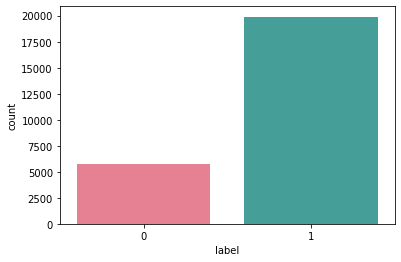

In [ ]:
import seaborn as sns

sns.countplot(x=df_review['label'], palette="husl")

Drop the unused column.

In [ ]:
df_preprocessed = df_review.copy()
df_preprocessed = df_preprocessed.drop(columns=['userName', 'at'])
df_preprocessed.tail()

,content,label
25610,Apk ini sangat bagus untuk bisa masuk mall tem...,1
25611,"Plis nerf paquito, gila jir sakit bgt damage nya",1
25612,Kok sudah saya dowlowd apk nya tp kok gk bisa ...,0
25613,Manntappp,1
25614,Lwmot klo mendung. Kijor,0


# Random Oversampling

In this case study, the technique used in dealing with the problem of unbalanced data or imbalanced data is random oversampling. This technique is done by re-sampling the data used by adding members of the minority class randomly so that the proportion is balanced with the majority class.

In [ ]:
s_1 = df_preprocessed[df_preprocessed['label']==0].sample(19898,replace=True)
s_2 = df_preprocessed[df_preprocessed['label']==1].sample(19898,replace=True)
df_preprocessed = pd.concat([s_1, s_2])

print(df_preprocessed.shape)
print(df_preprocessed['label'].value_counts(normalize=True))

(39796, 2)
0    0.5
1    0.5
Name: label, dtype: float64


The graph of the distribution of the data after random oversampling is as follows. The positive class is marked with the label 1, and the negative class is marked with the label 0.

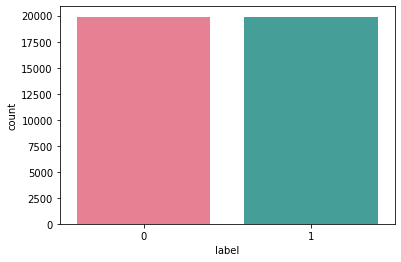

In [ ]:
import seaborn as sns

sns.countplot(x=df_preprocessed['label'],palette="husl")

# Data Preprocessing

The following are some data preprocessing processes that are carried out to reduce noise that is often found in text data.

In [ ]:
import string, re

def cleansing(data):
    # lower text
    data = data.lower()
    
    # hapus URL
    data = re.sub(r'http\S+', '', data)
    
    # hapus karakter special
    data = re.sub(r"[.,:;+!\-_<^/=?\"'\(\)\d\&*]", '', data)

    # remove ASCII dan unicode
    data = re.sub(r'[^\x00-\x7f]', r'', data)
    data = re.sub(r'(\\u[0-9A-Fa-f]+)', r'', data)
    data = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]"," ", data)
    data = re.sub(r'\\u\w\w\w\w', '', data)
    
    return data

In [ ]:
# jalankan cleansing data
review = []
for index, row in df_preprocessed.iterrows():
    review.append(cleansing(row["content"]))
    
df_preprocessed["content"] = review
df_preprocessed.tail()

,content,label
299,sangat membantu masayrakat dengan aplikasi ini...,1
9591,sangat membantu,1
12737,good,1
16800,smga manfaatjgn takut sholat berjamaahjaga pro...,1
14682,bgus aplnya d saat kondisi pandemi gni sngat d...,1


In [ ]:
!pip install Sastrawi

     |████████████████████████████████| 209 kB 9.9 MB/s 


In [ ]:
# Remove Stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
 
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

# Contoh
kalimat = 'saya ingin makan di rumah makan padang dengan teman saya'
stopwordd = stopword.remove(kalimat)
 
print(stopwordd)

ingin makan rumah makan padang teman


In [ ]:
# lakukan pada data kita

review = []
for index, row in df_preprocessed.iterrows():
    review.append(stopword.remove(row["content"]))
    
df_preprocessed["content"] = review
df_preprocessed[:8]

,content,label
11016,jangan samakan aplikasi dengan aplikasi pd umu...,0
14792,hello mohon maafsaya vaksin sertifikat keluar,0
25290,udah vaksin tidak di aplikasi pertama doang,0
7562,aplikasi gak jelas,0
22120,wagu aja,0
16506,sdh beerulang kali masukkan nama nik selalu mu...,0
22971,aplikasinya gimana sihh buat ngirim kode otp n...,0
19770,aplikasi jelas sudah vaksin yg dua sertifikat ...,0


In [ ]:
# Stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Contoh
kalimat = 'dia selalu jadi incaran, deretan mantannya sudah banyak'
katadasar = stemmer.stem(kalimat)
 
print(katadasar)

dia selalu jadi incar deret mantan sudah banyak


In [ ]:
# implementasi pada data kita
review = []
for index, row in df_preprocessed.iterrows():
    review.append(stemmer.stem(row["content"]))
    
df_preprocessed["content"] = review
df_preprocessed.tail()

,content,label
299,sangat bantu masayrakat aplikasi terimakasih,1
9591,sangat bantu,1
12737,good,1
16800,smga manfaatjgn takut sholat berjamaahjaga pro...,1
14682,bgus aplnya d kondisi pandemi gni sngat d butu...,1


# Word Cloud

Lets see the word cloud of each sentiment. 

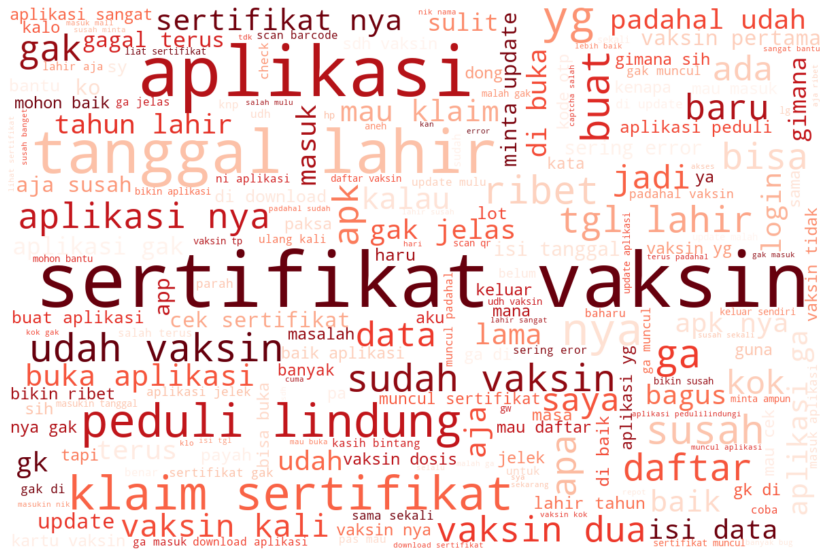

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Polarity == 0 negative
train_s0 = df_preprocessed[df_preprocessed["label"] == 0]
all_text_s0 = ' '.join(word for word in train_s0["content"])
wordcloud = WordCloud(colormap='Reds', width=1200, height=800, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

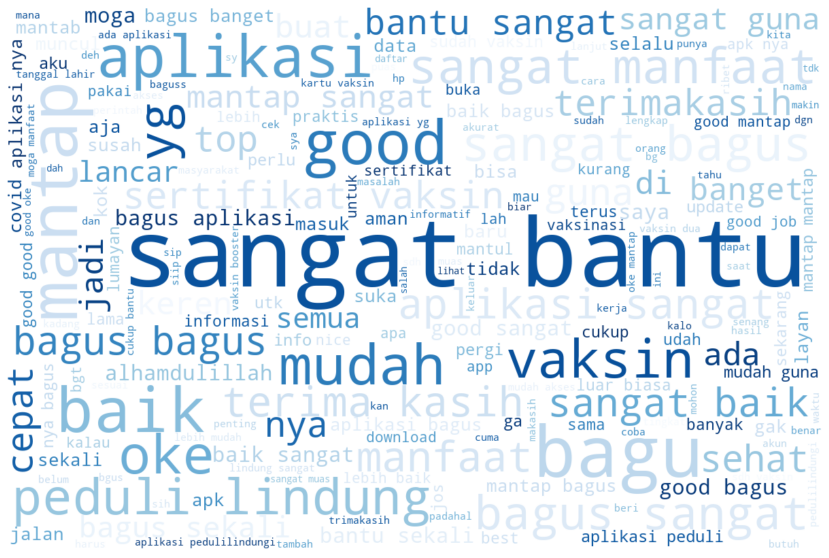

In [ ]:
# Polarity == 1 positive
train_s1 = df_preprocessed[df_preprocessed["label"] == 1]
all_text_s1 = ' '.join(word for word in train_s1["content"])
wordcloud = WordCloud(width=1200, height=800, colormap='Blues', background_color='white', mode='RGBA').generate(all_text_s1)
plt.figure( figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

# Split Data Training and Testing

I used 80% for training and 20% for testing

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_preprocessed['content'], df_preprocessed['label'], 
                                                    test_size=0.2, stratify=df_preprocessed['label'], random_state=30)

# Build the TF-IDF vector representation

The core of text mining and natural language processing is how to convert text data into numeric vectors that can be understood by machines. The first vector representation is TF-IDF.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    'Pusing satu kali',
    'Pusing dua kali',
    'Pusing tiga kali',
    'Pusing lagi',
    'Pusing kali kali']

vectorizer = TfidfVectorizer()

# contoh
X = vectorizer.fit_transform(corpus)
X.toarray()

array([[0.        , 0.45333103, 0.        , 0.38342448, 0.80465933,
        0.        ],
       [0.80465933, 0.45333103, 0.        , 0.38342448, 0.        ,
        0.        ],
       [0.        , 0.45333103, 0.        , 0.38342448, 0.        ,
        0.80465933],
       [0.        , 0.        , 0.90275015, 0.43016528, 0.        ,
        0.        ],
       [0.        , 0.92102677, 0.        , 0.38949927, 0.        ,
        0.        ]])

Lets see the dimension of our Training and Testing data

In [ ]:
# implementasi pada dokumen kita
X_train1 = vectorizer.fit_transform(X_train)
X_test1 = vectorizer.transform(X_test)

print(X_train1.shape)
print(X_test1.shape)

(31836, 9010)
(7960, 9010)


In [ ]:
X_train1.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

It's a sparse vector, that's why it contains so many 0

# Build the BoW vector representation

The second vector representation is Bag of Words (BoW).

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    'Pusing satu kali',
    'Pusing dua kali',
    'Pusing tiga kali',
    'Pusing lagi',
    'Pusing kali kali']

vectorizer2 = CountVectorizer()

# contoh
X = vectorizer2.fit_transform(corpus)
X.toarray()

array([[0, 1, 0, 1, 1, 0],
       [1, 1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 1],
       [0, 0, 1, 1, 0, 0],
       [0, 2, 0, 1, 0, 0]])

In [ ]:
# implementasi pada dokumen kita
X_train2 = vectorizer2.fit_transform(X_train)
X_test2 = vectorizer2.transform(X_test)
y_train2 = y_train
y_test2 = y_test

print(X_train2.shape)
print(X_test2.shape)

(31836, 9010)
(7960, 9010)


In [ ]:
X_train2.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# SGD-SVM with Hyperparameter Tuning (TF-IDF)

The first experiment for the SGD-SVM method was an experiment using the Term Frequency-Inverse Document Frequency (TF-IDF) text representation technique.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Defining parameter range
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
              'learning_rate':['constant', 'optimal', 'invscaling', 'adaptive'],
              'eta0': [0.0, 1.0, 10.0, 100.0],
              'power_t': [0.1, 0.5, 1.0, 10.0]}

grid = GridSearchCV(SGDClassifier(), param_grid, refit = True, verbose = 3)

# Fitting the model for grid search
grid.fit(X_train1, y_train)

Fitting 5 folds for each of 448 candidates, totalling 2240 fits
[CV 1/5] END alpha=0.0001, eta0=0.0, learning_rate=constant, power_t=0.1;, score=nan total time=   0.0s
[CV 2/5] END alpha=0.0001, eta0=0.0, learning_rate=constant, power_t=0.1;, score=nan total time=   0.0s
[CV 3/5] END alpha=0.0001, eta0=0.0, learning_rate=constant, power_t=0.1;, score=nan total time=   0.0s
[CV 4/5] END alpha=0.0001, eta0=0.0, learning_rate=constant, power_t=0.1;, score=nan total time=   0.0s
[CV 5/5] END alpha=0.0001, eta0=0.0, learning_rate=constant, power_t=0.1;, score=nan total time=   0.0s
[CV 1/5] END alpha=0.0001, eta0=0.0, learning_rate=constant, power_t=0.5;, score=nan total time=   0.0s
[CV 2/5] END alpha=0.0001, eta0=0.0, learning_rate=constant, power_t=0.5;, score=nan total time=   0.0s
[CV 3/5] END alpha=0.0001, eta0=0.0, learning_rate=constant, power_t=0.5;, score=nan total time=   0.0s
[CV 4/5] END alpha=0.0001, eta0=0.0, learning_rate=constant, power_t=0.5;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
420 fits failed out of a total of 2240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
420 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py", line 892, in fit
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py", line 649, in _fit
    self._validate_params()
  File "/usr/local/lib/python3

GridSearchCV(estimator=SGDClassifier(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'eta0': [0.0, 1.0, 10.0, 100.0],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'power_t': [0.1, 0.5, 1.0, 10.0]},
             verbose=3)

The results of hyperparameter tuning on training data with 5-fold cross validation show that the SGD-SVM model with the best performance value is the model with alpha = 0.0001, eta0 = 1.0, power_t = 10.0, and learning_rate = 'adaptive'.

In [ ]:
# Print the best parameter after tuning
print(grid.best_params_)

# Print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'alpha': 0.0001, 'eta0': 1.0, 'learning_rate': 'adaptive', 'power_t': 10.0}
SGDClassifier(eta0=1.0, learning_rate='adaptive', power_t=10.0)


Then the model with these hyparameters is tested on the testing data that was previously determined, the results of the experiment are as follows:

In [ ]:
grid_predictions = grid.predict(X_test1)

# Print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90      3980
           1       0.89      0.92      0.91      3980

    accuracy                           0.91      7960
   macro avg       0.91      0.91      0.91      7960
weighted avg       0.91      0.91      0.91      7960



to see more detailed figures:

In [ ]:
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, accuracy_score

# Melihat angka lebih jelas
# f1_score
print("f1 score hasil prediksi adalah: ")
print(f1_score(y_test, grid_predictions))

# accuracy score
print("accuracy score hasil prediksi adalah: ")
print(accuracy_score(y_test, grid_predictions))

# precision score
print("precision score hasil prediksi adalah: ")
print(precision_score(y_test, grid_predictions))

# recall score
print("recall score hasil prediksi adalah: ")
print(recall_score(y_test, grid_predictions))

f1 score hasil prediksi adalah: 
0.9066402868801781
accuracy score hasil prediksi adalah: 
0.9051507537688442
precision score hasil prediksi adalah: 
0.8926223520818115
recall score hasil prediksi adalah: 
0.921105527638191


In [ ]:
# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, grid_predictions).ravel()
tn, fp, fn, tp

(3539, 441, 314, 3666)

# SGD-SVM with Hyperparameter Tuning (BoW)

The second experiment for the SGD-SVM method was an experiment using the Bag of Words (BoW) text representation technique.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Defining parameter range
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
              'learning_rate':['constant', 'optimal', 'invscaling', 'adaptive'],
              'eta0': [0.0, 1.0, 10.0, 100.0],
              'power_t': [0.1, 0.5, 1.0, 10.0]}

grid2 = GridSearchCV(SGDClassifier(), param_grid, refit = True, verbose = 3)

# Fitting the model for grid search
grid2.fit(X_train2, y_train2)

Fitting 5 folds for each of 448 candidates, totalling 2240 fits
[CV 1/5] END alpha=0.0001, eta0=0.0, learning_rate=constant, power_t=0.1;, score=nan total time=   0.0s
[CV 2/5] END alpha=0.0001, eta0=0.0, learning_rate=constant, power_t=0.1;, score=nan total time=   0.0s
[CV 3/5] END alpha=0.0001, eta0=0.0, learning_rate=constant, power_t=0.1;, score=nan total time=   0.0s
[CV 4/5] END alpha=0.0001, eta0=0.0, learning_rate=constant, power_t=0.1;, score=nan total time=   0.0s
[CV 5/5] END alpha=0.0001, eta0=0.0, learning_rate=constant, power_t=0.1;, score=nan total time=   0.0s
[CV 1/5] END alpha=0.0001, eta0=0.0, learning_rate=constant, power_t=0.5;, score=nan total time=   0.0s
[CV 2/5] END alpha=0.0001, eta0=0.0, learning_rate=constant, power_t=0.5;, score=nan total time=   0.0s
[CV 3/5] END alpha=0.0001, eta0=0.0, learning_rate=constant, power_t=0.5;, score=nan total time=   0.0s
[CV 4/5] END alpha=0.0001, eta0=0.0, learning_rate=constant, power_t=0.5;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
420 fits failed out of a total of 2240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
420 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py", line 892, in fit
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py", line 649, in _fit
    self._validate_params()
  File "/usr/local/lib/python3

GridSearchCV(estimator=SGDClassifier(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'eta0': [0.0, 1.0, 10.0, 100.0],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'power_t': [0.1, 0.5, 1.0, 10.0]},
             verbose=3)

The results of hyperparameter tuning on training data with 5-fold cross validation show that the SGD-SVM model with the best performance value is the model with alpha = 0.0001, eta0 = 1.0, power_t = 10.0, and learning_rate = 'optimal'.

In [ ]:
# Print the best parameter after tuning
print(grid2.best_params_)

# Print how our model looks after hyper-parameter tuning
print(grid2.best_estimator_)

{'alpha': 0.0001, 'eta0': 1.0, 'learning_rate': 'optimal', 'power_t': 10.0}
SGDClassifier(eta0=1.0, power_t=10.0)


Then the model with these hyparameters is tested on the testing data that was previously determined, the results of the experiment are as follows:

In [ ]:
grid2_predictions = grid2.predict(X_test2)

# Print classification report
print(classification_report(y_test2, grid2_predictions))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      3980
           1       0.89      0.94      0.91      3980

    accuracy                           0.91      7960
   macro avg       0.91      0.91      0.91      7960
weighted avg       0.91      0.91      0.91      7960



to see more detailed figures:

In [ ]:
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, accuracy_score

# Melihat angka lebih jelas
# f1_score
print("f1 score hasil prediksi adalah: ")
print(f1_score(y_test2, grid2_predictions))

# accuracy score
print("accuracy score hasil prediksi adalah: ")
print(accuracy_score(y_test2, grid2_predictions))

# precision score
print("precision score hasil prediksi adalah: ")
print(precision_score(y_test2, grid2_predictions))

# recall score
print("recall score hasil prediksi adalah: ")
print(recall_score(y_test2, grid2_predictions))

f1 score hasil prediksi adalah: 
0.91336845974758
accuracy score hasil prediksi adalah: 
0.911180904522613
precision score hasil prediksi adalah: 
0.8914135374312365
recall score hasil prediksi adalah: 
0.9364321608040201


In [ ]:
# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test2, grid2_predictions).ravel()
tn, fp, fn, tp

(3526, 454, 253, 3727)

# SVM with Hyperparameter Tuning (TF-IDF)

The first experiment for the SVM method was an experiment using the Term Frequency-Inverse Document Frequency (TF-IDF) vector representation technique.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Defining parameter range
param_grid2 = {'C':[0.1, 1.0, 10.0, 100.0, 1000.0],
              'gamma':[0.0001, 0.001, 0.01, 0.1, 1, 'scale','auto']}

grid3 = GridSearchCV(SVC(), param_grid2, refit = True, verbose = 3)

# Fitting the model for grid search
grid3.fit(X_train1, y_train)

Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV 1/5] END ...............C=0.1, gamma=0.0001;, score=0.645 total time= 1.1min
[CV 2/5] END ...............C=0.1, gamma=0.0001;, score=0.500 total time= 1.1min
[CV 3/5] END ...............C=0.1, gamma=0.0001;, score=0.500 total time= 1.1min
[CV 4/5] END ...............C=0.1, gamma=0.0001;, score=0.500 total time= 1.1min
[CV 5/5] END ...............C=0.1, gamma=0.0001;, score=0.500 total time= 1.1min
[CV 1/5] END ................C=0.1, gamma=0.001;, score=0.645 total time= 1.1min
[CV 2/5] END ................C=0.1, gamma=0.001;, score=0.500 total time= 1.1min
[CV 3/5] END ................C=0.1, gamma=0.001;, score=0.500 total time= 1.1min
[CV 4/5] END ................C=0.1, gamma=0.001;, score=0.500 total time= 1.1min
[CV 5/5] END ................C=0.1, gamma=0.001;, score=0.500 total time= 1.1min
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.691 total time= 1.0min
[CV 2/5] END .................C=0.1, gamma=0.01

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1.0, 10.0, 100.0, 1000.0],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 'scale',
                                   'auto']},
             verbose=3)

In [ ]:
# Print the best parameter after tuning
print(grid3.best_params_)

# Print how our model looks after hyper-parameter tuning
print(grid3.best_estimator_)

{'C': 10.0, 'gamma': 'scale'}
SVC(C=10.0)


In [ ]:
grid3_predictions = grid3.predict(X_test1)

# Print classification report
print(classification_report(y_test, grid3_predictions))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      3980
           1       0.95      0.96      0.95      3980

    accuracy                           0.95      7960
   macro avg       0.95      0.95      0.95      7960
weighted avg       0.95      0.95      0.95      7960



In [ ]:
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, accuracy_score

# Melihat angka lebih jelas
# f1_score
print("f1 score hasil prediksi adalah: ")
print(f1_score(y_test, grid3_predictions))

# accuracy score
print("accuracy score hasil prediksi adalah: ")
print(accuracy_score(y_test, grid3_predictions))

# precision score
print("precision score hasil prediksi adalah: ")
print(precision_score(y_test, grid3_predictions))

# recall score
print("recall score hasil prediksi adalah: ")
print(recall_score(y_test, grid3_predictions))

f1 score hasil prediksi adalah: 
0.9529279560494444
accuracy score hasil prediksi adalah: 
0.9526381909547739
precision score hasil prediksi adalah: 
0.9471332836932241
recall score hasil prediksi adalah: 
0.9587939698492463


In [ ]:
# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, grid3_predictions).ravel()
tn, fp, fn, tp

(3767, 213, 164, 3816)

# SVM with Hyperparameter Tuning (BoW)

The second experiment for the SVM method was an experiment using the Bag of Words (BoW) vector representation technique.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Defining parameter range
param_grid2 = {'C':[0.1, 1.0, 10.0, 100.0, 1000.0],
              'gamma':[0.0001, 0.001, 0.01, 0.1, 1, 'scale','auto']}

grid4 = GridSearchCV(SVC(), param_grid2, refit = True, verbose = 3)

# Fitting the model for grid search
grid4.fit(X_train2, y_train2)

Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV 1/5] END ...............C=0.1, gamma=0.0001;, score=0.516 total time= 1.2min
[CV 2/5] END ...............C=0.1, gamma=0.0001;, score=0.500 total time= 1.2min
[CV 3/5] END ...............C=0.1, gamma=0.0001;, score=0.500 total time= 1.2min
[CV 4/5] END ...............C=0.1, gamma=0.0001;, score=0.500 total time= 1.2min
[CV 5/5] END ...............C=0.1, gamma=0.0001;, score=0.500 total time= 1.2min
[CV 1/5] END ................C=0.1, gamma=0.001;, score=0.670 total time= 1.0min
[CV 2/5] END ................C=0.1, gamma=0.001;, score=0.666 total time= 1.0min
[CV 3/5] END ................C=0.1, gamma=0.001;, score=0.673 total time= 1.0min
[CV 4/5] END ................C=0.1, gamma=0.001;, score=0.666 total time= 1.0min
[CV 5/5] END ................C=0.1, gamma=0.001;, score=0.664 total time= 1.0min
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.802 total time=  39.8s
[CV 2/5] END .................C=0.1, gamma=0.01

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1.0, 10.0, 100.0, 1000.0],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 'scale',
                                   'auto']},
             verbose=3)

In [ ]:
# Print the best parameter after tuning
print(grid4.best_params_)

# Print how our model looks after hyper-parameter tuning
print(grid4.best_estimator_)

{'C': 100.0, 'gamma': 0.1}
SVC(C=100.0, gamma=0.1)


In [ ]:
grid4_predictions = grid4.predict(X_test2)

# Print classification report
print(classification_report(y_test2, grid4_predictions))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      3980
           1       0.95      0.95      0.95      3980

    accuracy                           0.95      7960
   macro avg       0.95      0.95      0.95      7960
weighted avg       0.95      0.95      0.95      7960



In [ ]:
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, accuracy_score

# Melihat angka lebih jelas
# f1_score
print("f1 score hasil prediksi adalah: ")
print(f1_score(y_test2, grid4_predictions))

# accuracy score
print("accuracy score hasil prediksi adalah: ")
print(accuracy_score(y_test2, grid4_predictions))

# precision score
print("precision score hasil prediksi adalah: ")
print(precision_score(y_test2, grid4_predictions))

# recall score
print("recall score hasil prediksi adalah: ")
print(recall_score(y_test2, grid4_predictions))

f1 score hasil prediksi adalah: 
0.9474739877146797
accuracy score hasil prediksi adalah: 
0.9473618090452262
precision score hasil prediksi adalah: 
0.9454590943207406
recall score hasil prediksi adalah: 
0.949497487437186


In [ ]:
# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test2, grid4_predictions).ravel()
tn, fp, fn, tp

(3762, 218, 201, 3779)

# Model Performance Comparison

A comparison of the performance of each method in sentiment classification will be carried out. The performance compared is based on the value of precision, recall, f1-score, accuracy, and the average execution time of each tested method. Here are the comparison results obtained.

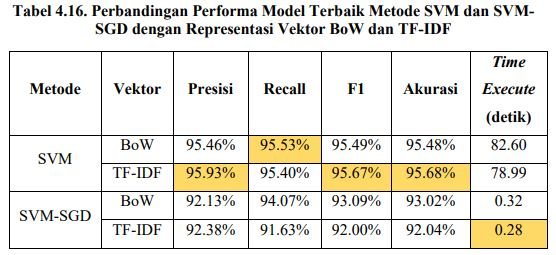

Based on the table above, it is known that both the SVM and SGDSVM methods provide excellent performance in classifying sentiment. The SVM method tends to be superior to SGD-SVM when measured from the value of precision, recall, f1-score, and accuracy. While the SGD-SVM method is superior when measured based on the efficiency of the time required to run the model. SGD-SVM both with BoW and with TF-IDF both only take about half a second to run one model. While SVM both with BoW and with TFIDF both take more than 1 minute to run one model.

In general, the performance of all tested methods is very good, but the SVM method with the TF-IDF vector is the best among other models, because it has the highest accuracy, recall, precision, and f1-score values, namely 95.68% accuracy, 95.93 precision. %, 95.40% recall, and 95.67% f1-score.